<a href="https://colab.research.google.com/github/SanjayBista1010/Classification/blob/main/DecisionTreeClassifiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree

df = pd.read_csv('weather_forecast.csv')
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [16]:
temp = {
    'Hot':2,
    'Mild':1,
    'Cool':0
}

humid = {
    'High':1,
    'Normal':0
}

wind = {
    'Strong':1,
    'Weak':0
}

play ={
    'Yes':1,
    'No':0
}
outlook = {
    'Sunny': 2,
    'Overcast': 1,
    'Rain': 0
}

In [17]:
df['Temperature'] = df['Temperature'].replace(temp)
df['Humidity'] = df['Humidity'].replace(humid)
df['Windy'] = df['Windy'].replace(wind)
df['Play'] = df['Play'].replace(play)
df['Outlook'] = df['Outlook'].replace(outlook)

/tmp/ipython-input-17-3230632591.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Temperature'] = df['Temperature'].replace(temp)
/tmp/ipython-input-17-3230632591.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Humidity'] = df['Humidity'].replace(humid)
/tmp/ipython-input-17-3230632591.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.se

In [18]:
y = df['Play']
y

,Play
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [19]:
X = df.drop('Play', axis=1)
X

,Outlook,Temperature,Humidity,Windy
0,2,2,1,0
1,2,2,1,1
2,1,2,1,0
3,0,1,1,0
4,0,0,0,0
5,0,0,0,1
6,1,0,0,1
7,2,1,1,0
8,2,0,0,0
9,0,1,0,0


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

c4_5 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
c4_5.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

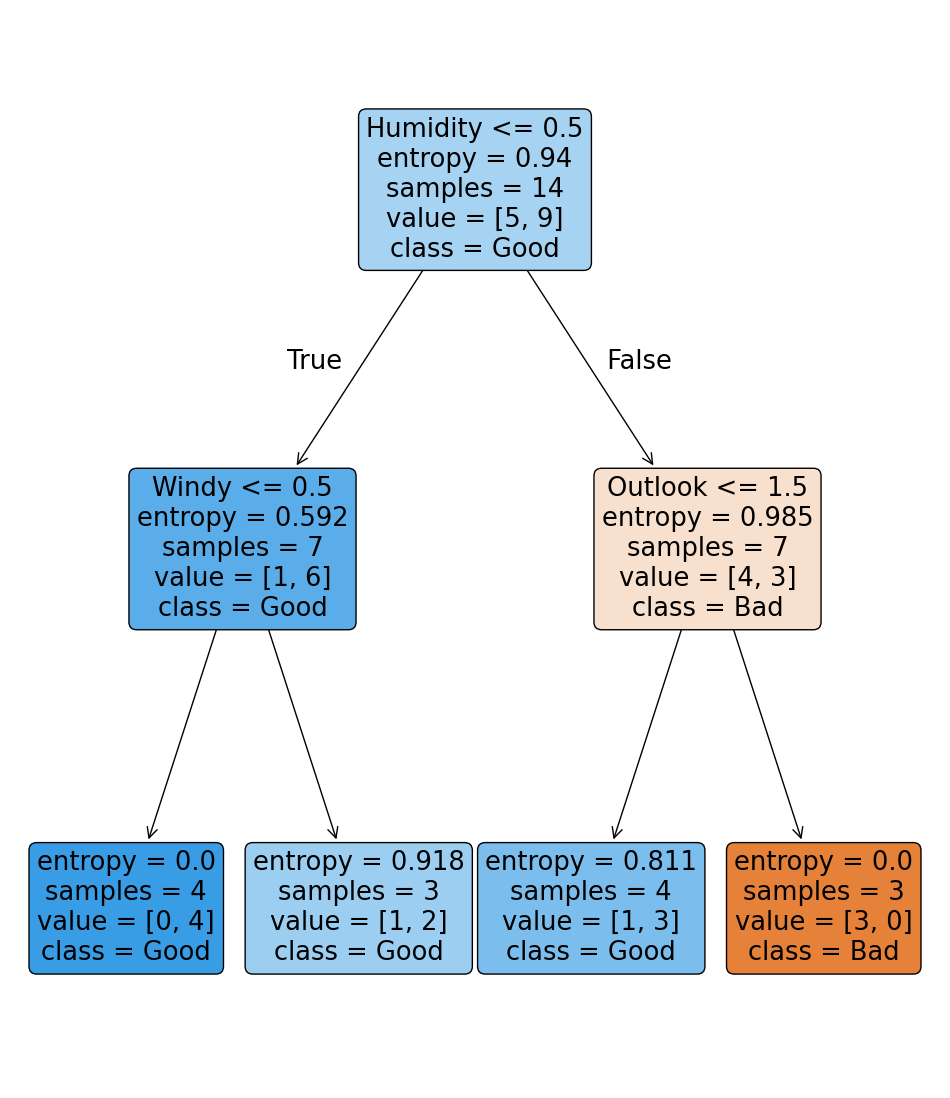

In [22]:
plt.figure(figsize=(12,14))
tree.plot_tree(c4_5, feature_names= X.columns.tolist(), class_names=['Bad', 'Good'], filled=True, rounded=True)
plt.savefig('./c4_5_tree.png', bbox_inches="tight")

In [23]:
cart = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
cart.fit(X, y)
y_pred_cart = cart.predict(X)

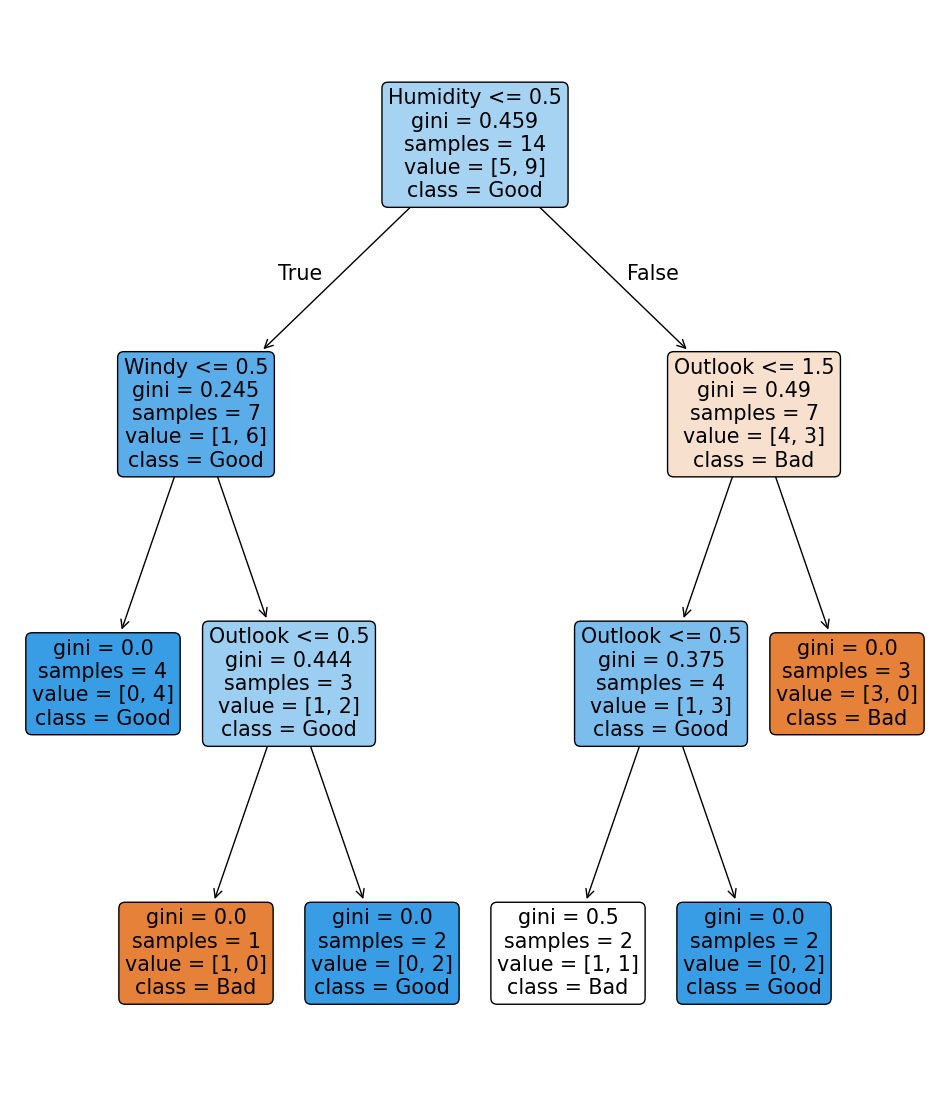

In [25]:
plt.figure(figsize=(12,14))
tree.plot_tree(cart, feature_names= X.columns.tolist(), class_names=['Bad', 'Good'], filled=True, rounded=True)
plt.savefig('./cart_tree.png', bbox_inches="tight")

In [27]:
print("CART Tree Depth:", cart.get_depth())
print("CART Number of Leaves:", cart.get_n_leaves())

CART Tree Depth: 3
CART Number of Leaves: 6


In [28]:
print("\nCART Feature Importances: ")
for feature, importance in zip(X.columns, cart.feature_importances_): print(f" {feature}: {importance:.4f}")


CART Feature Importances: 
 Outlook: 0.6930
 Temperature: 0.0000
 Humidity: 0.2368
 Windy: 0.0702
